In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns 
import geopandas as gpd

# Dataframe to manipulate

In [7]:
df_raw = pd.read_excel("C:/Users/cuatr/OneDrive/Desktop/PRACTICANDO/Adidas US Sales/dataset/Adidas US Sales Datasets.xlsx")
df = df_raw.copy() 

In [8]:
df = df.drop(df.index[0:3])
df = df.drop(df.columns[0], axis=1)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [9]:
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.reset_index(drop=True, inplace=True)
df.head(20)

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
5,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,0.25,In-store
6,Foot Locker,1185732,2020-01-07 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1250,625000,312500,0.5,In-store
7,Foot Locker,1185732,2020-01-08 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,900,450000,135000,0.3,Outlet
8,Foot Locker,1185732,2020-01-21 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,950,380000,133000,0.35,Outlet
9,Foot Locker,1185732,2020-01-22 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,825,371250,129937.5,0.35,Outlet


### Shape, columns, info, nulls and dates

In [10]:
df.shape

(9648, 13)

In [11]:
df.columns 

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [13]:
null_per_column = df.isna().sum(axis=0)
null_per_column

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# In-Depth Analysis

### SEASON MANAGEMENT

In [14]:
#Season Management
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

def get_season(row):
    month = row.month
    year = row.year
    if month in [3, 4, 5]:
        return f'Spring {year}'
    elif month in [6, 7, 8]:
        return f'Summer {year}'
    elif month in [9, 10, 11]:
        return f'Autumn {year}'
    else:
        return f'Winter {year}'
    
df['Season'] = df['Invoice Date'].apply(get_season)

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
years = [2020, 2021]

seasonal_dfs = {}

for year in years:
    for season in seasons:
        season_year = f'{season} {year}'
        seasonal_dfs[season_year] = df[df['Season'] == season_year]

spring_2020 = seasonal_dfs['Spring 2020']
summer_2020 = seasonal_dfs['Summer 2020']
autumn_2020 = seasonal_dfs['Autumn 2020']
winter_2020 = seasonal_dfs['Winter 2020']
spring_2021 = seasonal_dfs['Spring 2021']
summer_2021 = seasonal_dfs['Summer 2021']
autumn_2021 = seasonal_dfs['Autumn 2021']
winter_2021 = seasonal_dfs['Winter 2021']

seasonal_dfs_2020 = [seasonal_dfs['Spring 2020'], seasonal_dfs['Summer 2020'], seasonal_dfs['Autumn 2020'], seasonal_dfs['Winter 2020']]
seasonal_dfs_2021 = [seasonal_dfs['Spring 2021'], seasonal_dfs['Summer 2021'], seasonal_dfs['Autumn 2021'], seasonal_dfs['Winter 2021']]

In [15]:
spring_2020_sales = round(spring_2020['Total Sales'].sum())
summer_2020_sales = round(summer_2020['Total Sales'].sum())
autumn_2020_sales = round(autumn_2020['Total Sales'].sum())
winter_2020_sales = round(winter_2020['Total Sales'].sum())
spring_2021_sales = round(spring_2021['Total Sales'].sum())
summer_2021_sales = round(summer_2021['Total Sales'].sum())
autumn_2021_sales = round(autumn_2021['Total Sales'].sum())
winter_2021_sales = round(winter_2021['Total Sales'].sum())

season_int = [spring_2021_sales, summer_2020_sales, autumn_2020_sales, winter_2020_sales, 
          spring_2021_sales, summer_2021_sales, autumn_2021_sales, winter_2021_sales]

seasons = ['Spring 2020', 'Summer 2020', 'Autumn 2020', 'Winter 2020', 'Spring 2021', 
           'Summer 2021', 'Autumn 2021', 'Winter 2021']

sales_per_season = pd.DataFrame({
    'Season': seasons,
    'Sales': season_int
})

### SALES

In [16]:
df_2020 = pd.concat(seasonal_dfs_2020)
df_2021 = pd.concat(seasonal_dfs_2021)
total_sales_2020 = round(df_2020['Total Sales'].sum())
total_sales_2021 = round(df_2021['Total Sales'].sum())
total_sales_2020

182080675

In [17]:
total_sales_2021

717821450

### RETAILERS

In [18]:
all_retailers = df["Retailer"].unique()
all_retailers

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [19]:
total_sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum()
sorted_sales_by_retailer = total_sales_by_retailer.sort_values(ascending=False)
sorted_sales_by_retailer_df = sorted_sales_by_retailer.reset_index()
sorted_sales_by_retailer_df

,Retailer,Total Sales
0,West Gear,242964333.0
1,Foot Locker,220094720.0
2,Sports Direct,182470997.0
3,Kohl's,102114753.0
4,Amazon,77698912.0
5,Walmart,74558410.0


In [20]:
total_sales_by_retailer2020 = df_2020.groupby('Retailer')['Total Sales'].sum()
total_sales_by_retailer2021 = df_2021.groupby('Retailer')['Total Sales'].sum()
total_sales_by_retailer2020 = total_sales_by_retailer2020.sort_values(ascending=False)
total_sales_by_retailer2021 = total_sales_by_retailer2021.sort_values(ascending=False)
total_sales_by_retailer2020 = total_sales_by_retailer2020.reset_index()
total_sales_by_retailer2021 = total_sales_by_retailer2021.reset_index()
total_sales_by_retailer2020

,Retailer,Total Sales
0,West Gear,90299266.0
1,Foot Locker,42876805.0
2,Walmart,32885000.0
3,Sports Direct,15261101.0
4,Kohl's,758503


In [21]:
total_sales_by_retailer2021

,Retailer,Total Sales
0,Foot Locker,177217915.0
1,Sports Direct,167209896.0
2,West Gear,152665067.0
3,Kohl's,101356250.0
4,Amazon,77698912.0
5,Walmart,41673410.0


### REGIONS STATES AND CITIES

In [22]:
all_cities = df["City"].unique()
all_cities

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [23]:
total_sales_by_city = df.groupby('City')['Total Sales'].sum()
total_sales_by_city = total_sales_by_city.sort_values(ascending=False)
total_sales_by_city = total_sales_by_city.reset_index()
total_sales_by_city.head(20)

,City,Total Sales
0,Charleston,39974797.0
1,New York,39801235.0
2,San Francisco,34539220.0
3,Miami,31600863.0
4,Portland,30545652.0
5,Orlando,27682851.0
6,Seattle,26330718.0
7,Los Angeles,25634913.0
8,Houston,25456882.0
9,Albany,24427804.0


In [24]:
all_regions = df["Region"].unique()
all_regions

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [25]:
total_sales_by_region = df.groupby('Region')['Total Sales'].sum()
total_sales_by_region = total_sales_by_region.sort_values(ascending=False)
total_sales_by_region = total_sales_by_region.reset_index()
total_sales_by_region


,Region,Total Sales
0,West,269943182.0
1,Northeast,186324067.0
2,Southeast,163171236.0
3,South,144663181.0
4,Midwest,135800459.0


In [26]:
total_sales_by_state = df.groupby('State')['Total Sales'].sum()
total_sales_by_state = total_sales_by_state.sort_values(ascending=False)
total_sales_by_state = total_sales_by_state.reset_index()
total_sales_by_state.head(20)

,State,Total Sales
0,New York,64229039.0
1,California,60174133.0
2,Florida,59283714.0
3,Texas,46359746.0
4,South Carolina,29285637.0
5,Washington,26330718.0
6,North Carolina,23956531.0
7,Louisiana,23750781.0
8,Hawaii,22282457.0
9,Virginia,21575040.0


### PRODUCTS

In [27]:
unique_profit = df['Operating Margin'].unique()

unique_profit = unique_profit[:8]

products_and_profits = []

#Unique values iteration
for profit in unique_profit:
    rows = df[df['Operating Margin'] == profit]
    
    #Dataframe creation with 'Product' and 'Profit' columns
    new_df = pd.DataFrame({
        'Product': rows['Product'].iloc[0],
        'Profit': profit
    }, index=[0])
    
    products_and_profits.append(new_df)

products_and_profits = pd.concat(products_and_profits)
products_and_profits

,Product,Profit
0,Men's Street Footwear,0.50
0,Men's Athletic Footwear,0.30
0,Women's Street Footwear,0.35
0,Women's Apparel,0.25
0,Women's Athletic Footwear,0.45
0,Men's Street Footwear,0.35
0,Men's Athletic Footwear,0.20
0,Women's Apparel,0.15


In [28]:
product_sales_2020 = df_2020[["Invoice Date", "Product", "Units Sold"]].groupby("Product").agg({"Units Sold": "sum"}).reset_index()
product_sales_2021 = df_2021[["Invoice Date", "Product", "Units Sold"]].groupby("Product").agg({"Units Sold": "sum"}).reset_index()
product_sales = df[["Invoice Date", "Product", "Units Sold"]].groupby("Product").agg({"Units Sold": "sum"}).reset_index()
product_sales

3,Product,Units Sold
0,Men's Apparel,306683
1,Men's Athletic Footwear,435526
2,Men's Street Footwear,593320
3,Women's Apparel,433827
4,Women's Athletic Footwear,317236
5,Women's Street Footwear,392269


In [29]:
product_sales_2020

3,Product,Units Sold
0,Men's Apparel,61227
1,Men's Athletic Footwear,81760
2,Men's Street Footwear,99186
3,Women's Apparel,80208
4,Women's Athletic Footwear,64177
5,Women's Street Footwear,75791


In [30]:
product_sales_2021

3,Product,Units Sold
0,Men's Apparel,245456
1,Men's Athletic Footwear,353766
2,Men's Street Footwear,494134
3,Women's Apparel,353619
4,Women's Athletic Footwear,253059
5,Women's Street Footwear,316478


### PROFIT

In [31]:
profit_20 = round(df_2020['Operating Profit'].sum())
profit_21 = round(df_2021['Operating Profit'].sum())
profit_20

63375663

In [32]:
profit_21

268759099

In [33]:
profit_20_21 = round(profit_21 + profit_20)
profit_20_21

332134762

In [34]:
total_profit_by_city = df.groupby('City')['Operating Profit'].sum()
total_profit_by_city = total_profit_by_city.sort_values(ascending=False)
total_profit_by_city = total_profit_by_city.reset_index()
total_profit_by_city.head(20)

,City,Operating Profit
0,Charleston,15607190.11
1,New York,13899973.16
2,Miami,12168619.11
3,Portland,10760799.37
4,San Francisco,10256249.56
5,Houston,9845141.06
6,Charlotte,9756422.87
7,Albany,9429850.91
8,New Orleans,9417233.49
9,Birmingham,9147581.39


In [35]:
total_profit_by_region = df.groupby('Region')['Operating Profit'].sum()
total_profit_by_region = total_profit_by_region.sort_values(ascending=False)
total_profit_by_region = total_profit_by_region.reset_index()
total_profit_by_region

,Region,Operating Profit
0,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.7
4,Midwest,52811346.48


In [36]:
total_profit_by_state = df.groupby('State')['Operating Profit'].sum()
total_profit_by_state = total_profit_by_state.sort_values(ascending=False)
total_profit_by_state = total_profit_by_state.reset_index()
total_profit_by_state

,State,Operating Profit
0,New York,23329824.07
1,Florida,20926206.92
2,California,19301170.4
3,Texas,18688204.35
4,South Carolina,11324236.39
5,North Carolina,9756422.87
6,Louisiana,9417233.49
7,Alabama,9147581.39
8,Tennessee,8493660.06
9,Michigan,8135894.02


In [37]:
profit_by_product = df[["Invoice Date", "Product", "Operating Profit"]].groupby("Product").agg({"Operating Profit": "sum"}).reset_index()
profit_by_product

3,Product,Operating Profit
0,Men's Apparel,44763030.33
1,Men's Athletic Footwear,51846888.19
2,Men's Street Footwear,82802260.62
3,Women's Apparel,68650970.56
4,Women's Athletic Footwear,38975784.94
5,Women's Street Footwear,45095826.81


### CALIFORNIA AND FLORIDA COMPARISSON

In [38]:
df_california = df.loc[df['State'] == 'California']
df_florida = df.loc[df['State'] == 'Florida']

In [39]:
california_sales = df_california['Total Sales'].sum()
florida_sales = df_florida['Total Sales'].sum()
california_sales = pd.DataFrame([{'State': 'California', 'Total Sales': california_sales}])
florida_sales = pd.DataFrame([{'State': 'Florida', 'Total Sales': florida_sales}])
fl_calif_sales = pd.concat([california_sales, florida_sales], ignore_index=True)
fl_calif_sales

,State,Total Sales
0,California,60174133.0
1,Florida,59283714.0


In [40]:
california_profit = df_california['Operating Profit'].sum()
florida_profit = df_florida['Operating Profit'].sum()
california_profit = pd.DataFrame([{'State': 'California', 'Operating Profit': california_profit}])
florida_profit = pd.DataFrame([{'State': 'Florida', 'Operating Profit': florida_profit}])
fl_calif_profit = pd.concat([california_profit, florida_profit], ignore_index=True)
fl_calif_profit

,State,Operating Profit
0,California,19301170.40
1,Florida,20926206.92


In [41]:
california_product_sales = df_california.groupby('Product')['Total Sales'].sum().reset_index()
florida_product_sales = df_florida.groupby('Product')['Total Sales'].sum().reset_index()


# Visualization

### 2020-2021 Adidas Sales USA States Map (v)

#### Plot previous process

In [42]:
states = gpd.read_file("C:/Users/cuatr/OneDrive/Desktop/PRACTICANDO/Adidas US Sales/tl_2012_us_state/tl_2012_us_state.shp")
states.columns

Index(['OBJECTID', 'REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID',
       'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [43]:
print(states['NAME'].unique())

['Hawaii' 'Arkansas' 'New Mexico' 'Montana' 'New York' 'North Dakota'
 'South Dakota' 'Utah' 'Oregon' 'Washington' 'American Samoa' 'Idaho'
 'Commonwealth of the Northern Mariana Islands' 'Puerto Rico' 'Oklahoma'
 'New Jersey' 'Rhode Island' 'Louisiana' 'Connecticut'
 'United States Virgin Islands' 'West Virginia' 'Ohio' 'Kentucky'
 'Georgia' 'Mississippi' 'Massachusetts' 'Delaware' 'Vermont'
 'Pennsylvania' 'Maryland' 'Tennessee' 'Alabama' 'Virginia' 'Missouri'
 'New Hampshire' 'Maine' 'South Carolina' 'Iowa' 'North Carolina' 'Kansas'
 'Nebraska' 'Wyoming' 'Colorado' 'Minnesota' 'Wisconsin' 'Michigan'
 'Indiana' 'Alaska' 'Texas' 'Florida' 'District of Columbia' 'Illinois'
 'Guam' 'Arizona' 'Nevada' 'California']


#### 2020 vs 2021 Sales per State

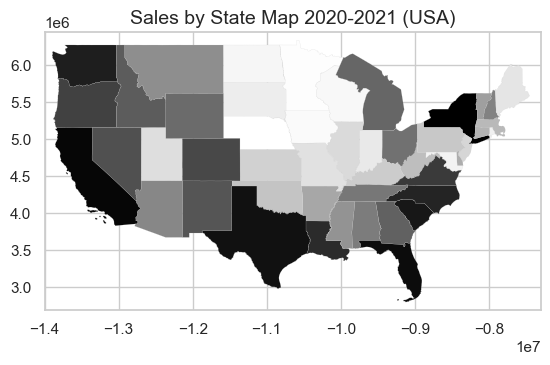

In [62]:
# total_sales_by_state

#states except AK
total_sales_by_state['State'] = total_sales_by_state['State'].str.title()

#Geopandas dataframe and sales dataframe merge
merged20_21 = states.set_index('NAME').join(total_sales_by_state.set_index('State'))

fig, ax = plt.subplots(1, 1)

#Colormap creation
merged20_21.plot(
    column='Total Sales', 
    cmap='Greys', 
    linewidth=0.1, 
    ax=ax, 
    edgecolor='0.8', 
    legend=False,
)

ax.set_xlim([-1.4e7, -0.73e7])
ax.set_ylim([0.27e7, 0.645e7])

plt.title('Sales by State Map 2020-2021 (USA)', fontsize=14, loc='center')

plt.show()

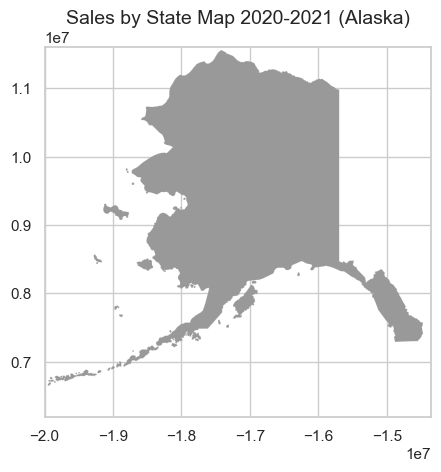

In [65]:
#AK 
total_sales_by_state['State'] = total_sales_by_state['State'].str.title()

merged = states.set_index('NAME').join(total_sales_by_state.set_index('State'))

fig, ax = plt.subplots(1, 1)

merged.plot(
    column='Total Sales', 
    cmap='Greys', 
    linewidth=0.1, 
    ax=ax, 
    edgecolor='0.8', 
    legend=False,
)
plt.title('Sales by State Map 2020-2021 (Alaska)', fontsize=14, loc='center')

ax.set_xlim([-2e7, -1.435e7])
ax.set_ylim([0.62e7, 1.16e7])
plt.show()

### 2020-2021 Adidas Sales and Profit per City (v)

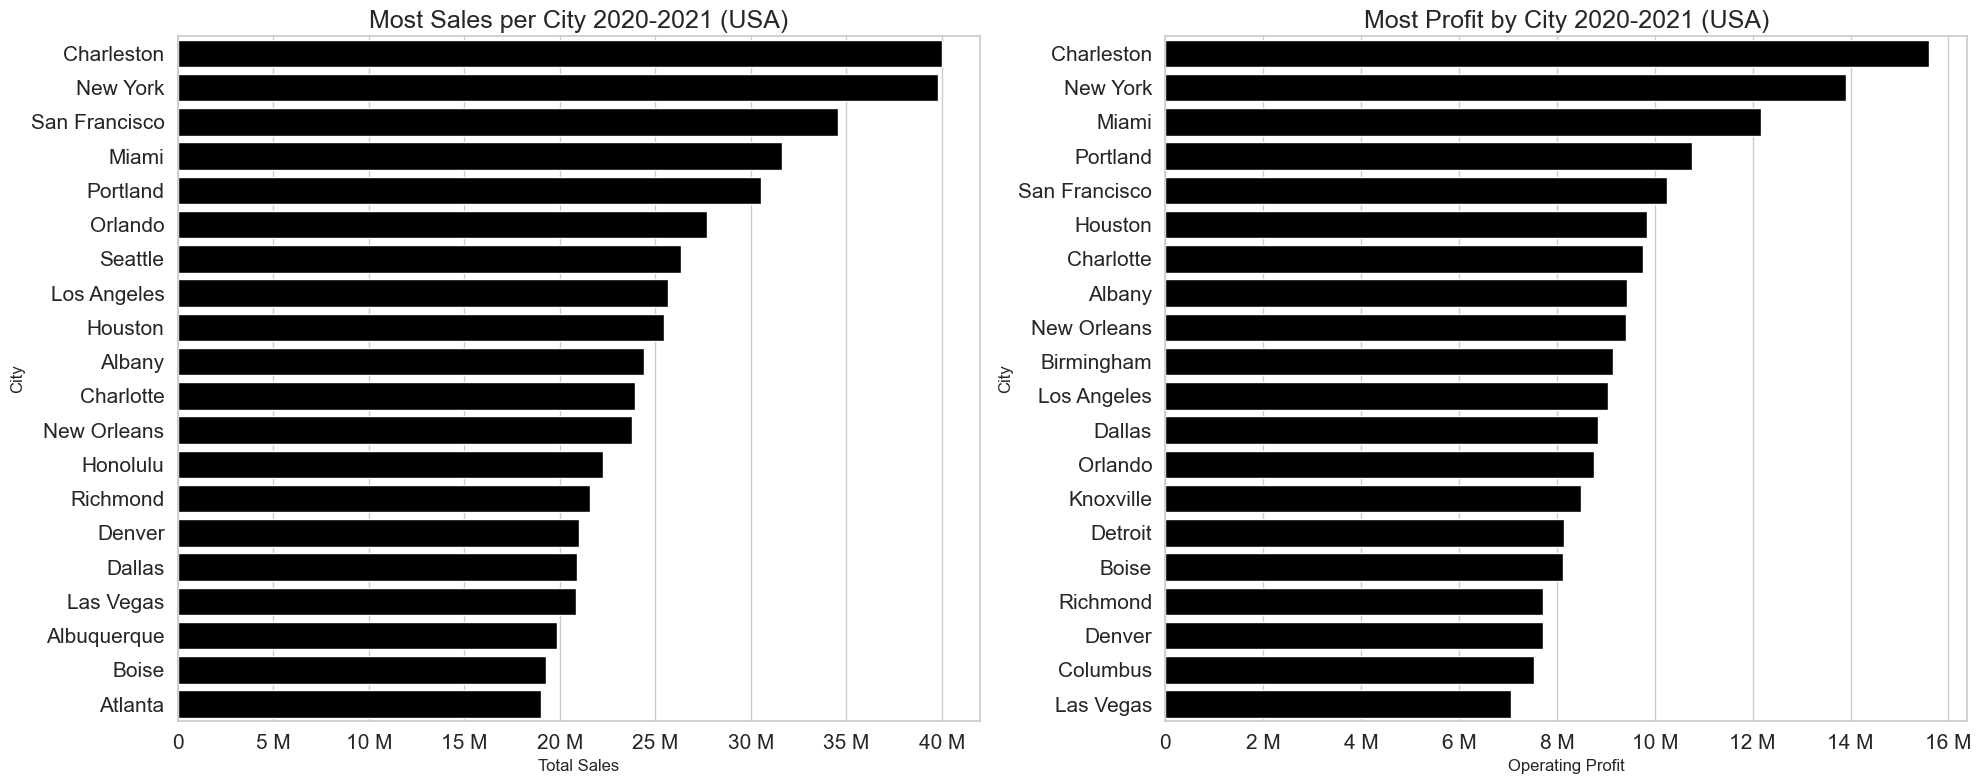

In [46]:
# total_sales_by_city
# total_profit_by_city

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

barplot1 = sns.barplot(x="Total Sales", y="City", data=total_sales_by_city.head(20), color="black", ax=axs[0])
axs[0].set_title("Most Sales per City 2020-2021 (USA)", fontsize=18, loc='center')
fmt = ticker.EngFormatter()
barplot1.xaxis.set_major_formatter(fmt)

barplot2 = sns.barplot(x="Operating Profit", y="City", data=total_profit_by_city.head(20), color="black", ax=axs[1])
axs[1].set_title("Most Profit by City 2020-2021 (USA)", fontsize=18, loc='center')
barplot2.xaxis.set_major_formatter(fmt)

for ax in axs:
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

### 2020-2021 Adidas Sales and Profit per Region (v)

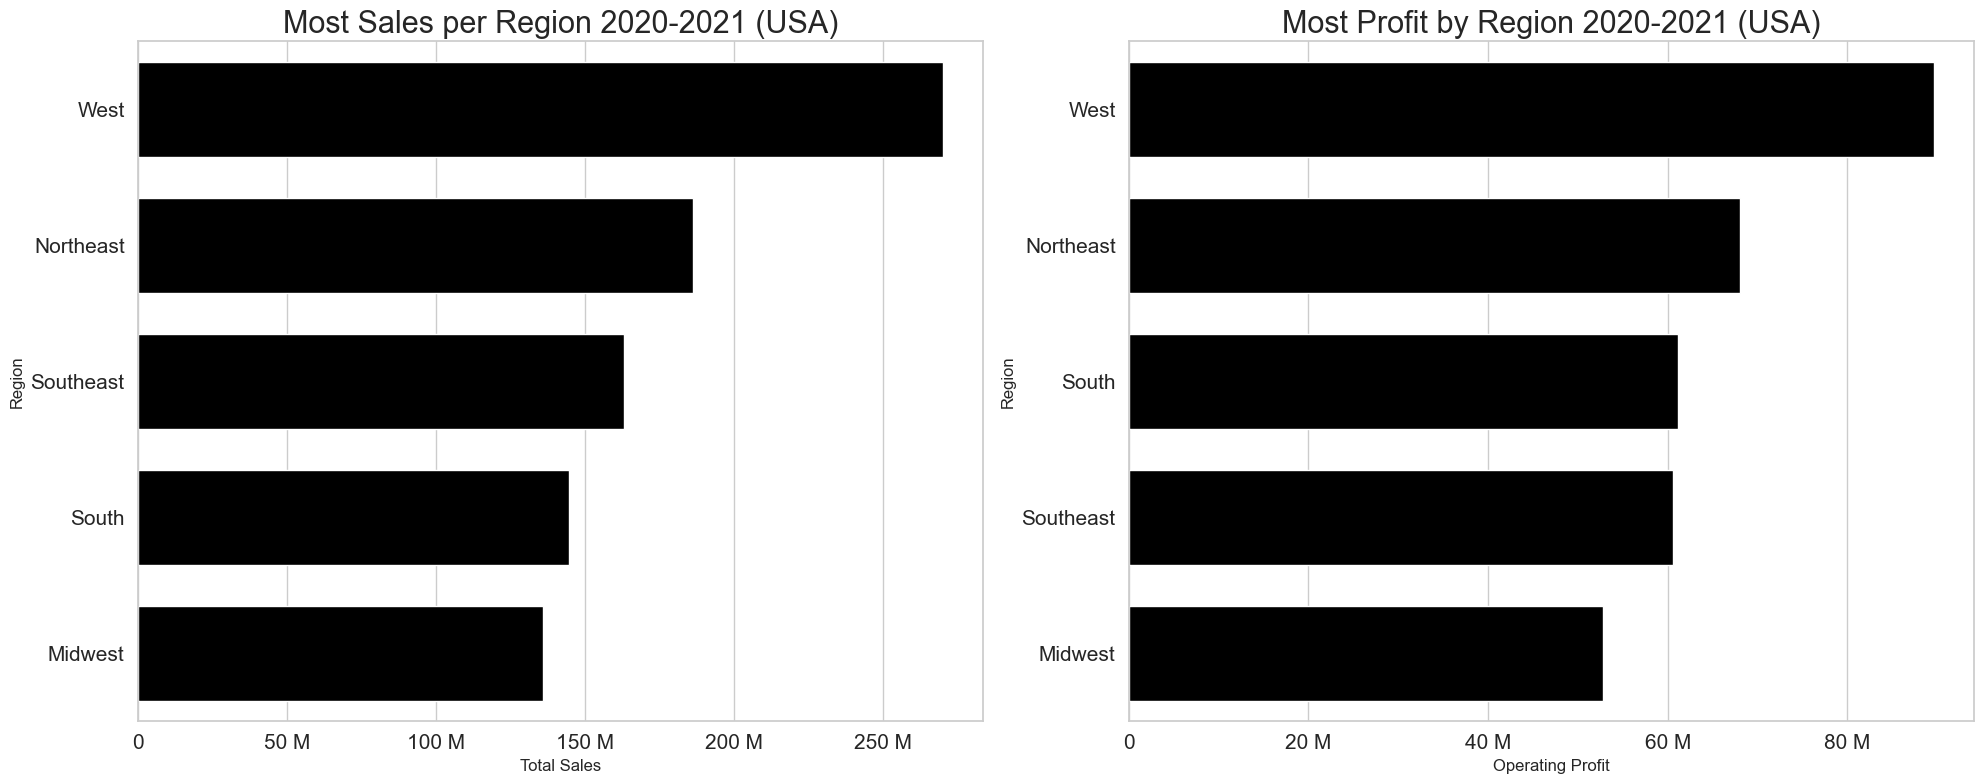

In [75]:
# total_sales_by_region
# total_profit_by_region

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

barplot1 = sns.barplot(x="Total Sales", y="Region", data=total_sales_by_region.head(20), color="black", ax=axs[0], width=0.7)
axs[0].set_title("Most Sales per Region 2020-2021 (USA)", fontsize=22, loc='center')
fmt = ticker.EngFormatter()
barplot1.xaxis.set_major_formatter(fmt)

barplot2 = sns.barplot(x="Operating Profit", y="Region", data=total_profit_by_region.head(20), color="black", ax=axs[1], width=0.7)
axs[1].set_title("Most Profit by Region 2020-2021 (USA)", fontsize=22, loc='center')
barplot2.xaxis.set_major_formatter(fmt)

for ax in axs:
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

### 2020-2021 Adidas Sales and Profit per State (v)

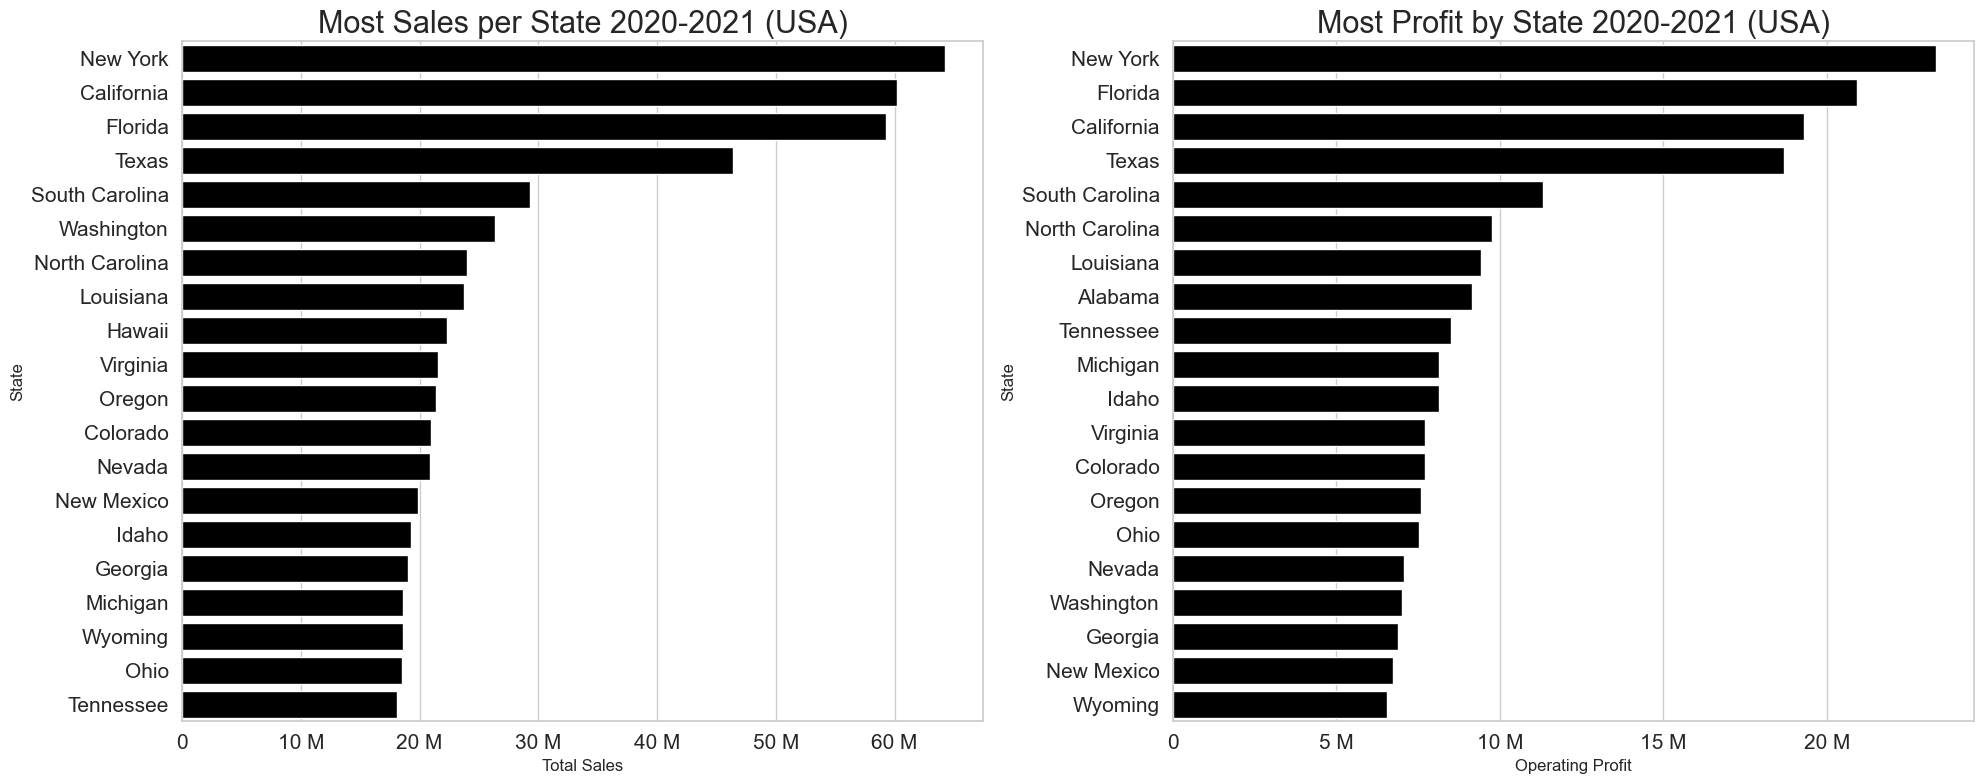

In [48]:
# total_sales_by_state
# total_profit_by_state

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

barplot1 = sns.barplot(x="Total Sales", y="State", data=total_sales_by_state.head(20), color="black", ax=axs[0])
axs[0].set_title("Most Sales per State 2020-2021 (USA)", fontsize=22, loc='center')
fmt = ticker.EngFormatter()
barplot1.xaxis.set_major_formatter(fmt)

barplot2 = sns.barplot(x="Operating Profit", y="State", data=total_profit_by_state.head(20), color="black", ax=axs[1])
axs[1].set_title("Most Profit by State 2020-2021 (USA)", fontsize=22, loc='center')
barplot2.xaxis.set_major_formatter(fmt)

for ax in axs:
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

### CALIFORNIA AND FLORIDA

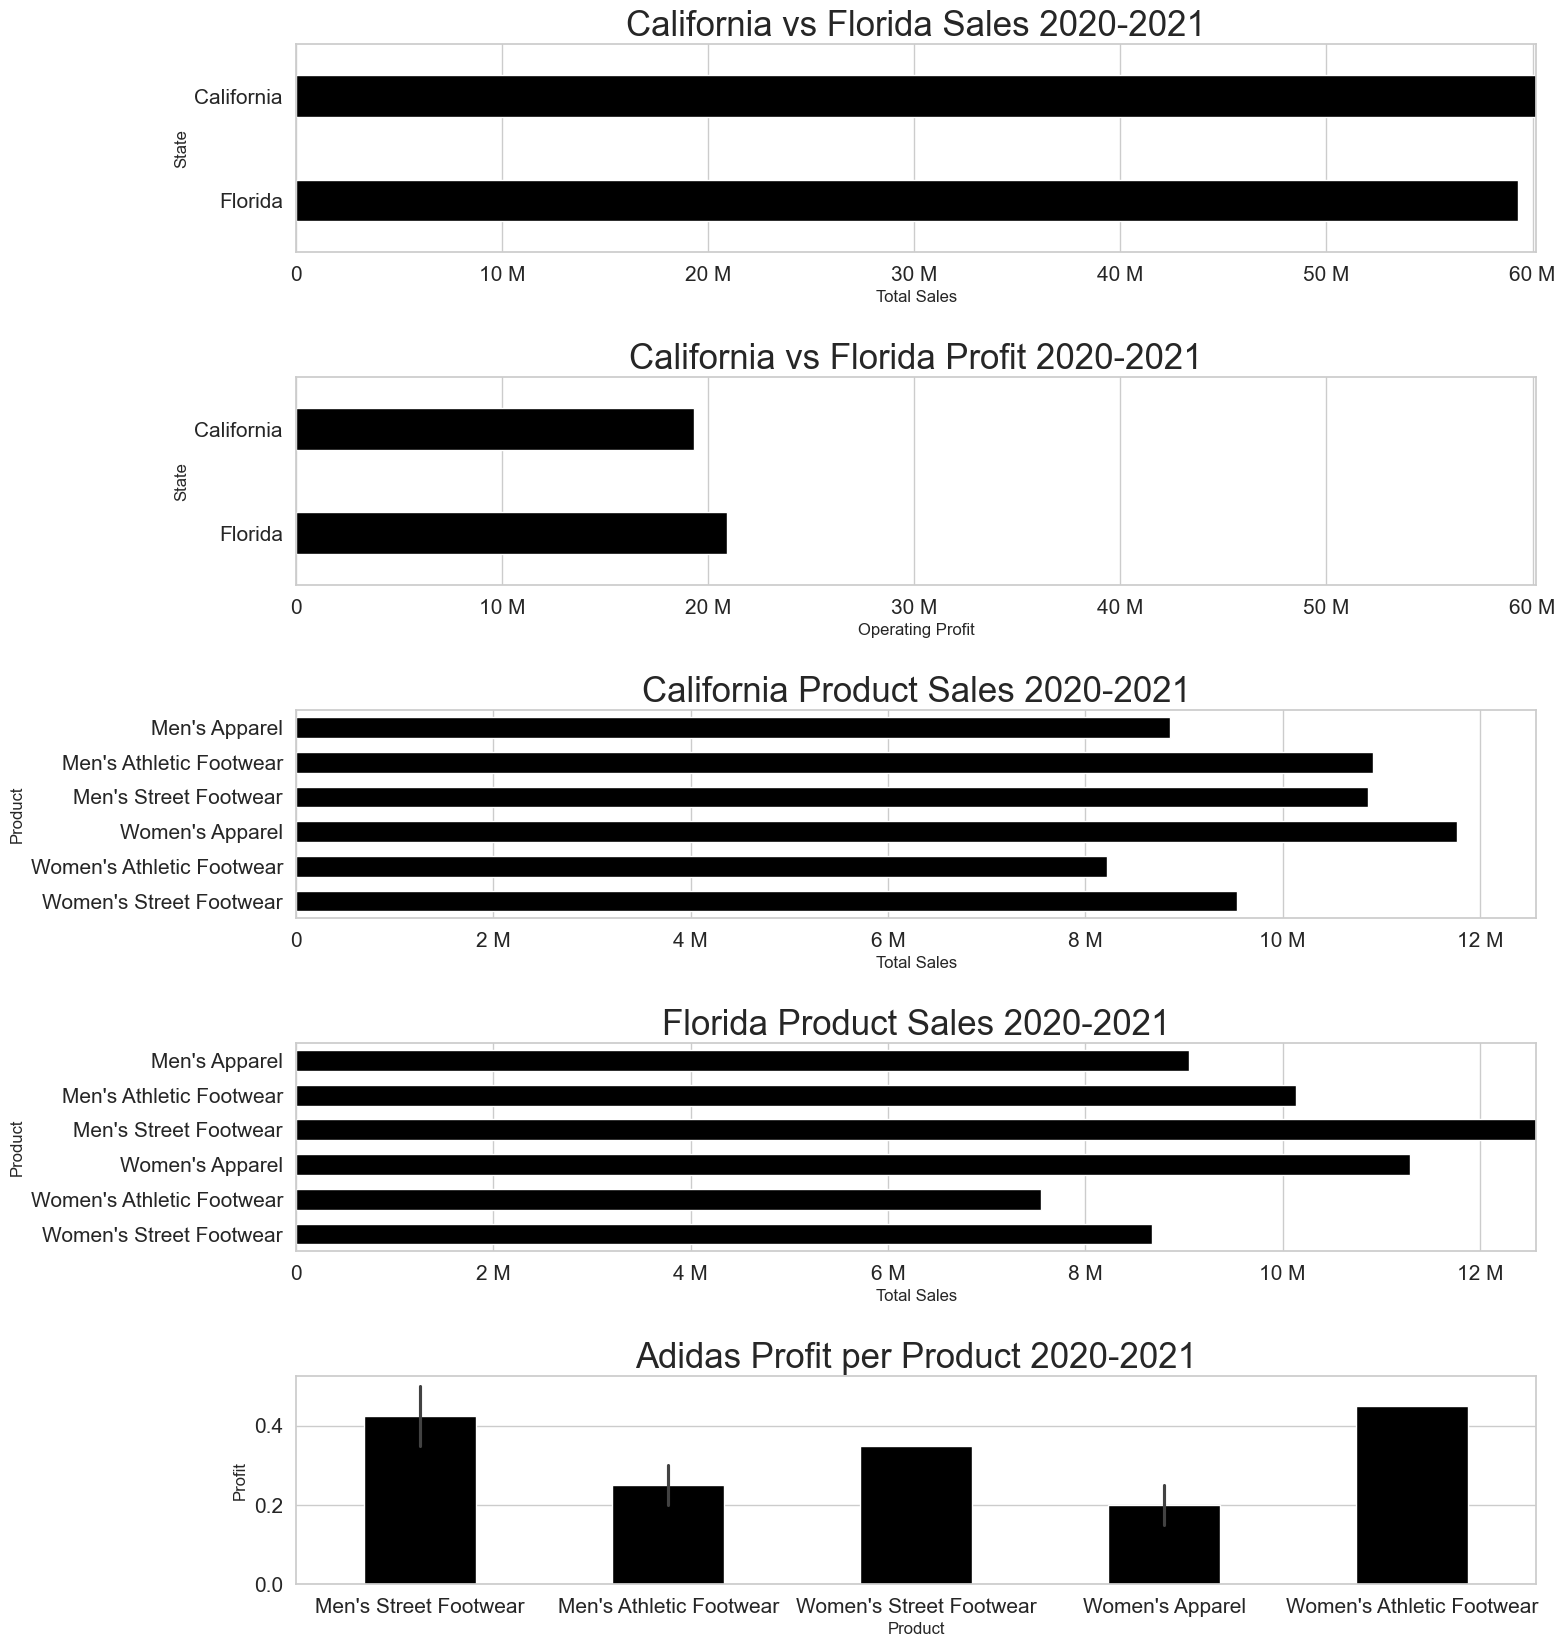

In [49]:
# fl_calif_sales
# fl_calif_profit

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(5, 1, figsize=(16, 20))

barplot1 = sns.barplot(x="Total Sales", y="State", data=fl_calif_sales, color="black", width=0.4, ax=axs[0])
axs[0].set_title("California vs Florida Sales 2020-2021", fontsize=25, loc='center')
barplot1.xaxis.set_major_formatter(fmt) 

barplot2 = sns.barplot(x="Operating Profit", y="State", data=fl_calif_profit, color="black", width=0.4, ax=axs[1])
axs[1].set_title("California vs Florida Profit 2020-2021", fontsize=25, loc='center')
barplot2.xaxis.set_major_formatter(fmt)

max_x = max(fl_calif_sales["Total Sales"].max(), fl_calif_profit["Operating Profit"].max())

axs[0].set_xlim([0, max_x])
axs[1].set_xlim([0, max_x])

# florida_product_sales
# california_product_sales

barplot3 = sns.barplot(x="Total Sales", y="Product", data=california_product_sales, color="black", width=0.6, ax=axs[2])
axs[2].set_title("California Product Sales 2020-2021", fontsize=25, loc='center')
barplot3.xaxis.set_major_formatter(fmt) 

barplot4 = sns.barplot(x="Total Sales", y="Product", data=florida_product_sales, color="black", width=0.6, ax=axs[3])
axs[3].set_title("Florida Product Sales 2020-2021", fontsize=25, loc='center')
barplot4.xaxis.set_major_formatter(fmt) 

max_xproduct = max(california_product_sales["Total Sales"].max(), florida_product_sales["Total Sales"].max())

axs[2].set_xlim([0, max_xproduct])
axs[3].set_xlim([0, max_xproduct])

barplot5 = sns.barplot(x="Product", y="Profit", data=products_and_profits, color="black", width=0.45, ax=axs[4])
axs[4].set_title("Adidas Profit per Product 2020-2021", fontsize=25, loc='center')

for ax in axs:
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15) 

plt.subplots_adjust(hspace = 0.6)

plt.show()

### 2020-2021 Adidas Sales per Season (v)

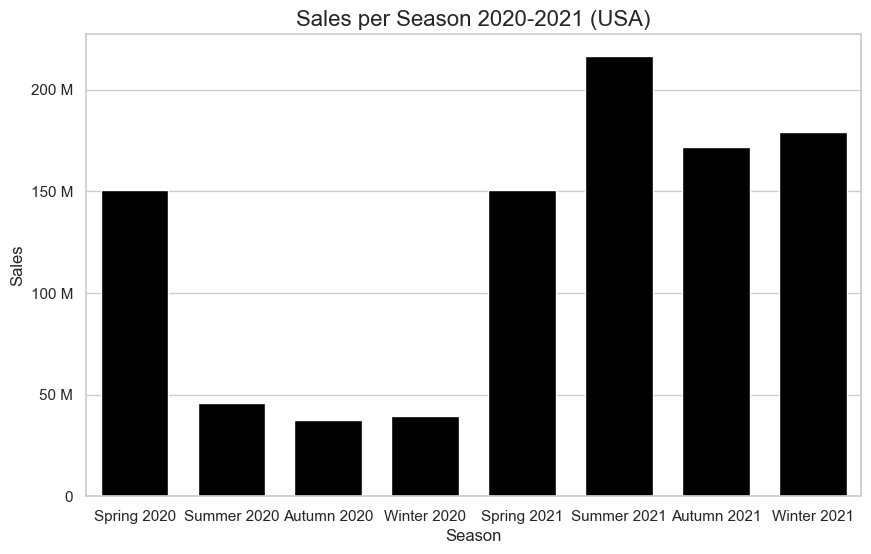

In [50]:
# sales_per_season

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
barplot = sns.barplot(x='Season', y='Sales', data=sales_per_season, color='black', width=0.7)

plt.title('Sales per Season 2020-2021 (USA)', fontsize=16, loc='center')

barplot.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

### 2020-2021 Adidas Sales and Profit by Product (v)

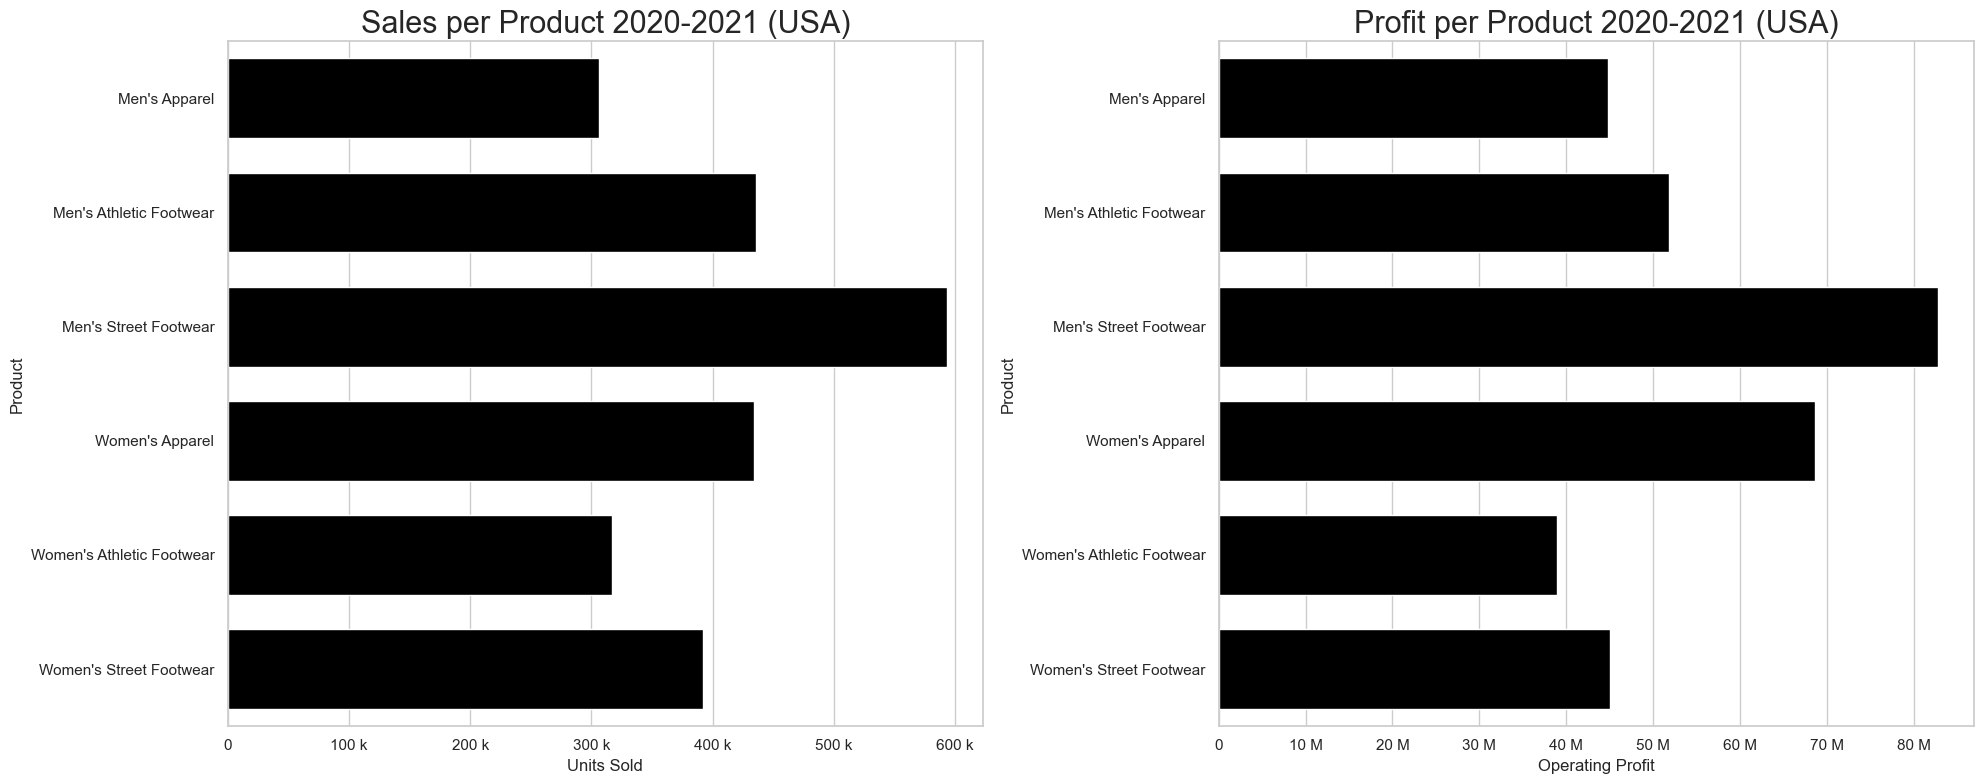

In [74]:
# profit_by_product
# product_sales

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

barplot1 = sns.barplot(x="Units Sold", y="Product", data=product_sales, color="black", ax=axs[0], width=0.7)
axs[0].set_title("Sales per Product 2020-2021 (USA)", fontsize=22, loc='center')
fmt = ticker.EngFormatter()
barplot1.xaxis.set_major_formatter(fmt)

barplot2 = sns.barplot(x="Operating Profit", y="Product", data=profit_by_product, color="black", ax=axs[1], width=0.7)
axs[1].set_title("Profit per Product 2020-2021 (USA)", fontsize=22, loc='center')
barplot2.xaxis.set_major_formatter(fmt)

plt.tight_layout()
plt.show()

### 2020-2021 Adidas Retailer Sales (v)

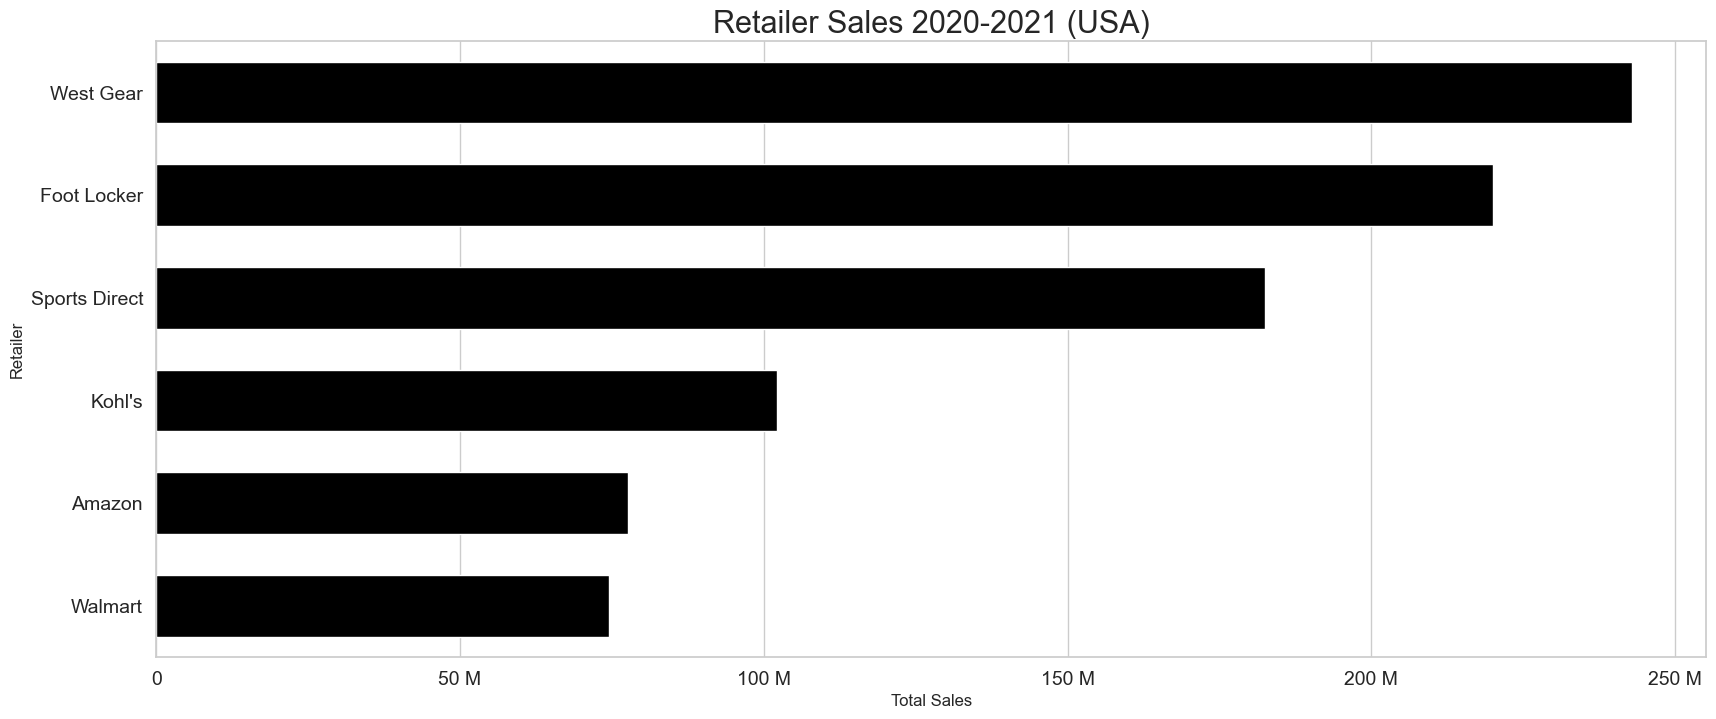

In [77]:
# sorted_sales_by_retailer_df

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 8))
barplot = sns.barplot(x="Total Sales", y="Retailer", data=sorted_sales_by_retailer_df, color="black", width=0.6)

plt.title("Retailer Sales 2020-2021 (USA)", fontsize=22, loc='center')

fmt = ticker.EngFormatter()
barplot.xaxis.set_major_formatter(fmt)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()